# Transformation of Data 

In [79]:
library(tidyverse)
library(nycflights13)
library(gridExtra)

# 5. Data Transformation 
## 5.1.3 dplyr basics
### In this chapter you are going to learn the five key dplyr functions that allow you to solve the vast majority of your data manipulation challenges:
   
 - Pick observations by their values (filter()).
 - Reorder the rows (arrange()).
 - Pick variables by their names (select()).
 - Create new variables with functions of existing variables (mutate()).
 - Collapse many values down to a single summary (summarise()).


In [3]:
head(flights) # 2013년 nyc에 이착률 비행기.

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      517            515         2      830            819
2 2013     1   1      533            529         4      850            830
3 2013     1   1      542            540         2      923            850
4 2013     1   1      544            545        -1     1004           1022
5 2013     1   1      554            600        -6      812            837
6 2013     1   1      554            558        -4      740            728
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1        11      UA   1545  N14228    EWR  IAH      227     1400    5     15
2        20      UA   1714  N24211    LGA  IAH      227     1416    5     29
3        33      AA   1141  N619AA    JFK  MIA      160     1089    5     40
4       -18      B6    725  N804JB    JFK  BQN      183     1576    5     45
5       -25      DL    461  N668DN    LGA  ATL      116      762    6      0
6        12  

### 5.2 Filter rows with filter()
 - data.table을 데이터 규모가 큰 경우 dplyr보단 더 많이 사용하지만 불편하다.

In [5]:
filter(flights, month==1, day==1) %>% head(2)
flights %>% filter(month==1,day==1) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      517            515         2      830            819
2 2013     1   1      533            529         4      850            830
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1        11      UA   1545  N14228    EWR  IAH      227     1400    5     15
2        20      UA   1714  N24211    LGA  IAH      227     1416    5     29
            time_hour
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      517            515         2      830            819
2 2013     1   1      533            529         4      850            830
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1        11      UA   1545  N14228    EWR  IAH      227     1400    5     15
2        20      UA   1714  N24211    LGA  IAH      227     1416    5     29
            time_hour
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00

### Logical Operations
 - | vs || (or) 

In [6]:
c(1,2,3) > 2

[1] FALSE FALSE  TRUE

In [8]:
c(1,2,3) > 2  | c(4,5,6) <= 4  # 짝을 지어서 한다. 순서대로 1>2,4<=4 이런식으로 짝을 지어서 

[1]  TRUE FALSE  TRUE

In [9]:
c(1,2,3) > 2  || c(4,5,6) <= 4 # 맨앞에꺼 하나만 가지고 한다. 

[1] TRUE

In [11]:
filter(flights, month==11 | month==12) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013    11   1        5           2359         6      352            345
2 2013    11   1       35           2250       105      123           2356
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1         7      B6    745  N568JB    JFK  PSE      205     1617   23     59
2        87      B6   1816  N353JB    JFK  SYR       36      209   22     50
            time_hour
1 2013-11-01 23:00:00
2 2013-11-01 22:00:00

 - %in% 연산자 : 포함하는 것

In [12]:
filter(flights, month %in% c(11,12)) %>% head(2) # 중의 연산자 : month가 11월 12월 중.

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013    11   1        5           2359         6      352            345
2 2013    11   1       35           2250       105      123           2356
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1         7      B6    745  N568JB    JFK  PSE      205     1617   23     59
2        87      B6   1816  N353JB    JFK  SYR       36      209   22     50
            time_hour
1 2013-11-01 23:00:00
2 2013-11-01 22:00:00

### 5.2.3 Na Missing Value

In [13]:
is.na(NA)

[1] TRUE

In [15]:
!is.na("123")

[1] TRUE

In [16]:
NA ^ 0 # -> 1 모든 수의 0 승은 1 
NA | TRUE
FALSE & NA

[1] 1

[1] TRUE

[1] FALSE

 - But...

In [17]:
## but 
NA * 0 #NA....?

[1] NA

### 5.2.4 Exercises
    1. Find all flights that
      1.1. Had an arrival delay of two or more hours

In [30]:
filter(flights, arr_delay>=120) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      811            630       101     1047            830
2 2013     1   1      848           1835       853     1001           1950
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1       137      MQ   4576  N531MQ    LGA  CLT      118      544    6     30
2       851      MQ   3944  N942MQ    JFK  BWI       41      184   18     35
            time_hour
1 2013-01-01 06:00:00
2 2013-01-01 18:00:00

    1.2. Flew to Houston (IAH or HOU)

In [31]:
filter(flights, dest %in% c('IAH','HOU')) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      517            515         2      830            819
2 2013     1   1      533            529         4      850            830
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1        11      UA   1545  N14228    EWR  IAH      227     1400    5     15
2        20      UA   1714  N24211    LGA  IAH      227     1416    5     29
            time_hour
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00

    1.3. Were operated by United, American, or Delta

In [32]:
unique(flights$carrier)

[1] "UA" "AA" "B6" "DL" "EV" "MQ" "US" "WN" "VX" "FL" "AS" "9E" "F9" "HA" "YV"
[16] "OO"

In [33]:
filter(flights, carrier %in% c('UA','AA','DL')) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      517            515         2      830            819
2 2013     1   1      533            529         4      850            830
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1        11      UA   1545  N14228    EWR  IAH      227     1400    5     15
2        20      UA   1714  N24211    LGA  IAH      227     1416    5     29
            time_hour
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00

    1.4. Departed in summer (July, August, and September)

In [34]:
filter(flights, month %in% 7:9) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     7   1        1           2029       212      236           2359
2 2013     7   1        2           2359         3      344            344
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1       157      B6    915  N653JB    JFK  SFO      315     2586   20     29
2         0      B6   1503  N805JB    JFK  SJU      200     1598   23     59
            time_hour
1 2013-07-01 20:00:00
2 2013-07-01 23:00:00

In [35]:
filter(flights, between(month,7,9)) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     7   1        1           2029       212      236           2359
2 2013     7   1        2           2359         3      344            344
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1       157      B6    915  N653JB    JFK  SFO      315     2586   20     29
2         0      B6   1503  N805JB    JFK  SJU      200     1598   23     59
            time_hour
1 2013-07-01 20:00:00
2 2013-07-01 23:00:00

    1.5. Arrived more than two hours late, but didn’t leave late

In [36]:
filter(flights, dep_delay<=0, arr_delay > 120) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1  27     1419           1420        -1     1754           1550
2 2013    10   7     1350           1350         0     1736           1526
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1       124      MQ   3728  N1EAMQ    EWR  ORD      135      719   14     20
2       130      EV   5181  N611QX    LGA  MSN      117      812   13     50
            time_hour
1 2013-01-27 14:00:00
2 2013-10-07 13:00:00

    1.6. Were delayed by at least an hour, but made up over 30 minutes in flight

In [37]:
filter(flights, dep_delay >= 60, arr_delay < dep_delay - 30) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1     2205           1720       285       46           2040
2 2013     1   1     2326           2130       116      131             18
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1       246      AA   1999  N5DNAA    EWR  MIA      146     1085   17     20
2        73      B6    199  N594JB    JFK  LAS      290     2248   21     30
            time_hour
1 2013-01-01 17:00:00
2 2013-01-01 21:00:00

    1.7. Departed between midnight and 6am (inclusive)

In [38]:
filter(flights, dep_time <= 600) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      517            515         2      830            819
2 2013     1   1      533            529         4      850            830
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1        11      UA   1545  N14228    EWR  IAH      227     1400    5     15
2        20      UA   1714  N24211    LGA  IAH      227     1416    5     29
            time_hour
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00

    3. How many flights have a missing dep_time? What other variables are missing? What might these rows represent?

In [39]:
filter(flights,is.na(dep_time)) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1       NA           1630        NA       NA           1815
2 2013     1   1       NA           1935        NA       NA           2240
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1        NA      EV   4308  N18120    EWR  RDU       NA      416   16     30
2        NA      AA    791  N3EHAA    LGA  DFW       NA     1389   19     35
            time_hour
1 2013-01-01 16:00:00
2 2013-01-01 19:00:00

### 5.3 Arrange

In [ ]:
arrange(flights, arr_delay) # 오름 차순
arrange(flights, desc(arr_delay)) #내림 차순 

### 5.4 Select

In [40]:
select(flights, year, month,day) %>% head(2)

,year,month,day
1,2013,1,1
2,2013,1,1


In [41]:
select(flights, year:day) %>% head(2)

,year,month,day
1,2013,1,1
2,2013,1,1


In [42]:
select(flights, -(year:day)) %>% head(2)

  dep_time sched_dep_time dep_delay arr_time sched_arr_time arr_delay carrier
1      517            515         2      830            819        11      UA
2      533            529         4      850            830        20      UA
  flight tailnum origin dest air_time distance hour minute           time_hour
1   1545  N14228    EWR  IAH      227     1400    5     15 2013-01-01 05:00:00
2   1714  N24211    LGA  IAH      227     1416    5     29 2013-01-01 05:00:00

#### starts_with("abc"): matches names that begin with “abc”.

In [43]:
select(flights, starts_with('dep')) %>% head(2)

,dep_time,dep_delay
1,517,2
2,533,4


#### ends_with("xyz"): matches names that end with “xyz”.

In [49]:
select(flights, ends_with('delay')) %>% head(2)

,dep_delay,arr_delay
1,2,11
2,4,20


#### Starts with & End with

In [50]:
select(flights, ends_with('delay'),starts_with('dep')) %>% head(2)

,dep_delay,arr_delay,dep_time
1,2,11,517
2,4,20,533


#### contains("ijk"): matches names that contain “ijk”.

In [51]:
select(flights, contains('d')) %>% head(3)

,day,dep_time,sched_dep_time,dep_delay,sched_arr_time,arr_delay,dest,distance
1,1,517,515,2,819,11,IAH,1400
2,1,533,529,4,830,20,IAH,1416
3,1,542,540,2,850,33,MIA,1089


#### matches("(.)\\1")
 - selects variables that match a regular expression. <br> This one matches any variables that contain repeated characters. You’ll learn more about regular expressions in strings.
 - Regular Expression.

In [52]:
select(flights, matches('d[aeiou]')) %>% head(2) # d뒤에 aeiou가 붙는 경우 

,day,dep_time,sched_dep_time,dep_delay,arr_delay,dest,distance
1,1,517,515,2,11,IAH,1400
2,1,533,529,4,20,IAH,1416


#### num_range("x", 1:3) matches x1, x2 and x3. 동일한 변수 뒤에 숫자가 붙은 경우 

### Rename : Change Colnum's Name

In [53]:
rename(flights, tail_num = tailnum) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      517            515         2      830            819
2 2013     1   1      533            529         4      850            830
  arr_delay carrier flight tail_num origin dest air_time distance hour minute
1        11      UA   1545   N14228    EWR  IAH      227     1400    5     15
2        20      UA   1714   N24211    LGA  IAH      227     1416    5     29
            time_hour
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00

#### Everything : 모든 Column's Names
 - Column의 순서를 변경할 때 사용.

In [55]:
select(flights, time_hour, air_time, everything()) %>% head(2)

            time_hour air_time year month day dep_time sched_dep_time dep_delay
1 2013-01-01 05:00:00      227 2013     1   1      517            515         2
2 2013-01-01 05:00:00      227 2013     1   1      533            529         4
  arr_time sched_arr_time arr_delay carrier flight tailnum origin dest distance
1      830            819        11      UA   1545  N14228    EWR  IAH     1400
2      850            830        20      UA   1714  N24211    LGA  IAH     1416
  hour minute
1    5     15
2    5     29

### 5.5 Add New variables with mutate()

In [56]:
flights_sml <- select(flights, 
                      year:day, 
                      ends_with("delay"), 
                      distance, 
                      air_time
)

In [57]:
mutate(flights_sml, gain=arr_delay - dep_delay, speed = distance / air_time * 60) %>% head(2)

,year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed
1,2013.0000,1.0000,1.0000,2.0000,11.0000,1400.0000,227.0000,9.0000,370.0441
2,2013.0000,1.0000,1.0000,4.0000,20.0000,1416.0000,227.0000,16.0000,374.2731


### pipe

In [58]:
arrange(filter(flights,month==1),day) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      517            515         2      830            819
2 2013     1   1      533            529         4      850            830
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1        11      UA   1545  N14228    EWR  IAH      227     1400    5     15
2        20      UA   1714  N24211    LGA  IAH      227     1416    5     29
            time_hour
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00

 - 위 식을 보기 편하게 변경.

In [59]:
flights %>% filter(month==1) %>% arrange(day) %>% head(2)

  year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013     1   1      517            515         2      830            819
2 2013     1   1      533            529         4      850            830
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1        11      UA   1545  N14228    EWR  IAH      227     1400    5     15
2        20      UA   1714  N24211    LGA  IAH      227     1416    5     29
            time_hour
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00

### Summarize 

In [60]:
summarise(flights, delay=mean(dep_delay,na.rm=T))

,delay
1,12.63907


In [62]:
by_day <- flights %>% group_by(year,month,day) %>% summarise(delay=mean(dep_delay,na.rm=T))
head(by_day)

,year,month,day,delay
1,2013.00000,1.00000,1.00000,11.54893
2,2013.00000,1.00000,2.00000,13.85882
3,2013.00000,1.00000,3.00000,10.98783
4,2013.000000,1.000000,4.000000,8.951595
5,2013.000000,1.000000,5.000000,5.732218
6,2013.000000,1.000000,6.000000,7.148014


In [63]:
flights %>% group_by(year,month,day) %>% summarise(delay=mean(dep_delay,na.rm=T), cnt=n()) %>% head(2)

,year,month,day,delay,cnt
1,2013.00000,1.00000,1.00000,11.54893,842.00000
2,2013.00000,1.00000,2.00000,13.85882,943.00000


## 5. 탐색적 모형 분석 
 - 모형이 있는 것이 아니라, 그냥 데이터를 뒤져보는 것을 말한다.
 - 환인적 탐색 분석보다 탐색적 모형분석이 오래 걸린다.
 - 그래프를 그려본다. (특징을 슥 찾아본다.)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


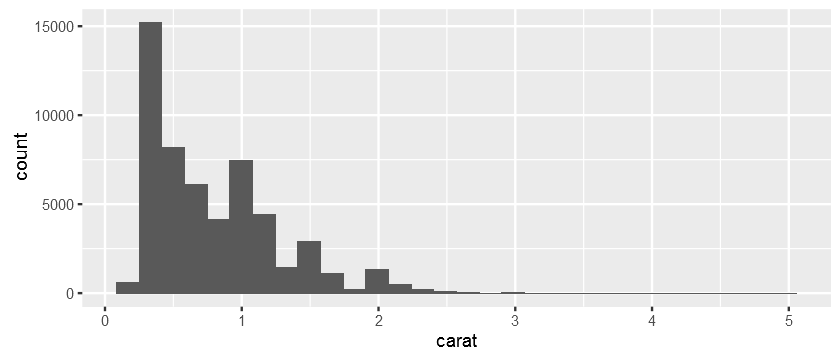

In [65]:
options(repr.plot.height=3)
ggplot(data=diamonds) + geom_histogram(aes(x=carat))

 - 특이한 패턴이 나온다. 특정한 무게에서 짤라서 쓰지 않을까?

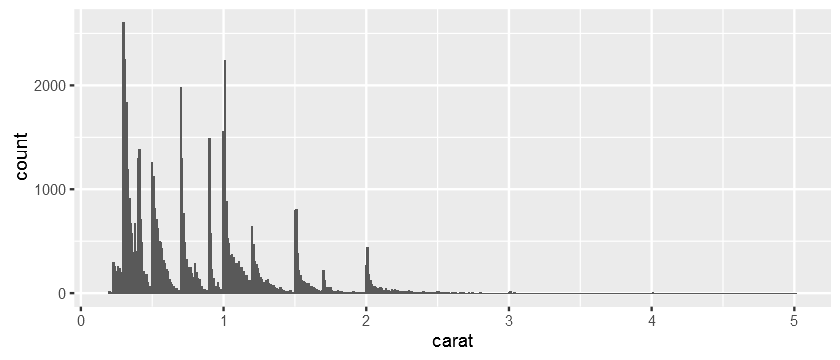

In [66]:
ggplot(data=diamonds) + geom_histogram(aes(x=carat), binwidth = 0.01)

### 기술적으로 대단한 것은 아니지만, 발상이 대단한 부분이다.

 - 양봉 그래프의 경우 boxplot을 그리게 되면 중간의 데이터가 있던 없던 동일한 모양이 나오는데 
 - Histogram을 세로로 세운다면 정보의 손실이 없다.
 <img src="2.PNG">

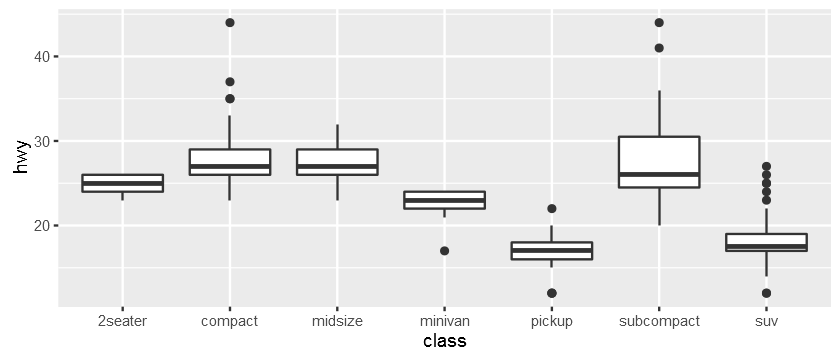

In [68]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
  geom_boxplot()

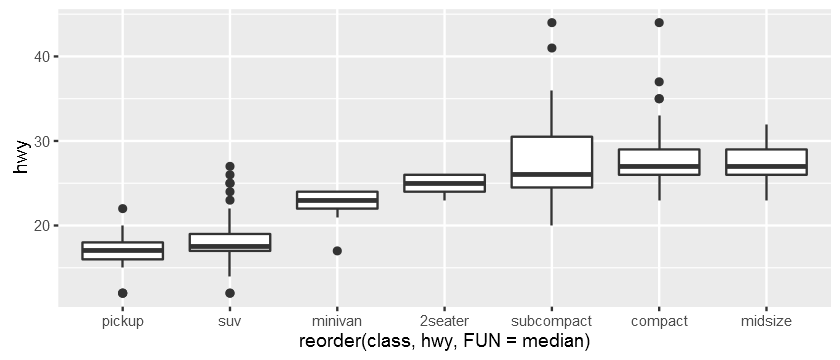

In [69]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median), y = hwy)) # reorder median을 기준으로

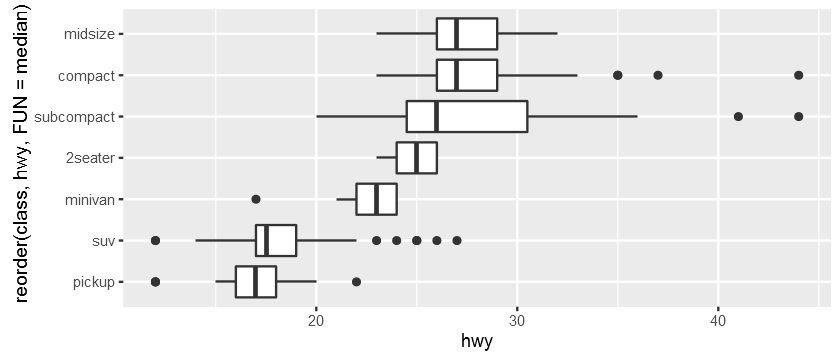

In [70]:
ggplot(data = mpg) +
  geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median), y = hwy)) +
  coord_flip()

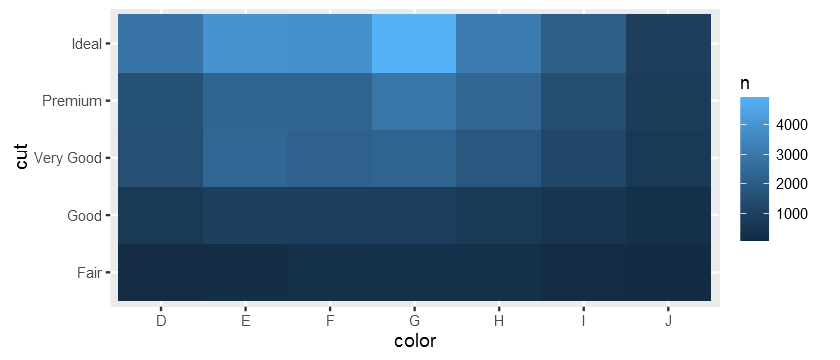

In [71]:
diamonds %>% 
  count(color, cut) %>%  
  ggplot(mapping = aes(x = color, y = cut)) +
  geom_tile(mapping = aes(fill = n))

### 7.5.3 Two continuous variables

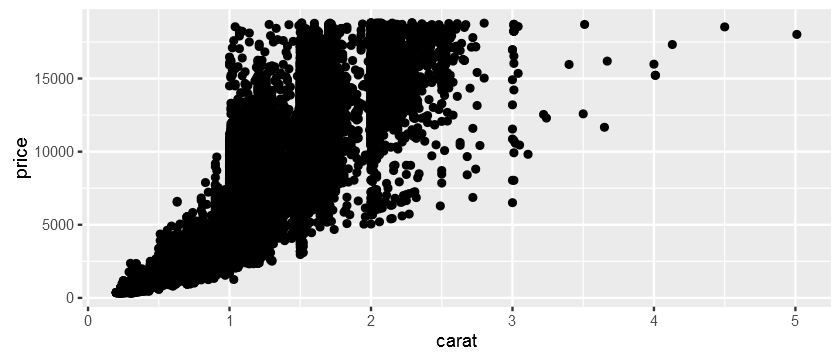

In [72]:
ggplot(data = diamonds) +
  geom_point(mapping = aes(x = carat, y = price))

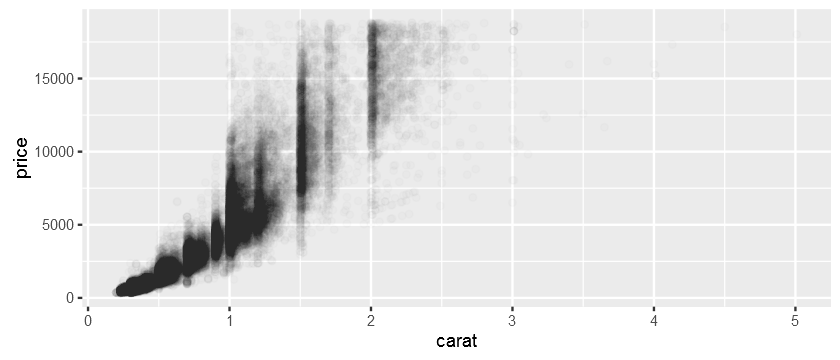

In [73]:
ggplot(data = diamonds) + 
  geom_point(mapping = aes(x = carat, y = price), alpha = 1 / 100)

 - geom_bin2d() and geom_hex() divide the coordinate plane into 2d bins and then use a fill color to display how many points fall into each bin.

In [75]:
library(hexbin)

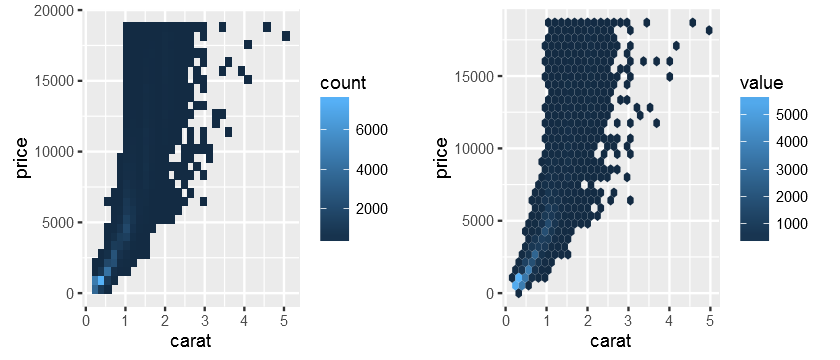

In [82]:
gg1 <- ggplot(data = diamonds) +
  geom_bin2d(mapping = aes(x = carat, y = price))

# install.packages("hexbin")
gg2 <- ggplot(data = diamonds) +
  geom_hex(mapping = aes(x = carat, y = price))

grid.arrange(gg1,gg2,ncol=2)

 - Another option is to bin one continuous variable so it acts like a categorical variable.

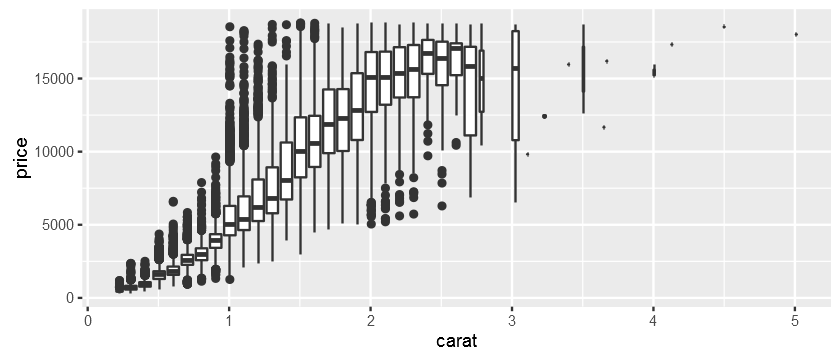

In [83]:
ggplot(data = diamonds, mapping = aes(x = carat, y = price)) + 
  geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)))